In [51]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

# Packages / libraries
import os

from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import r2_score, explained_variance_score, mean_absolute_error, mean_squared_error
from math import sqrt
from sklearn.model_selection import RandomizedSearchCV, StratifiedKFold, train_test_split
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score, explained_variance_score, confusion_matrix, accuracy_score, classification_report, log_loss


# To change scientific numbers to float
np.set_printoptions(formatter={'float_kind':'{:f}'.format})

# Increases the size of sns plots
sns.set(rc={'figure.figsize':(5,5)})

# view all the dataframe
pd.set_option('display.max_columns', None)
#pd.set_option('display.max_rows', None)

# remove warnings
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
pd.options.mode.chained_assignment = None

In [2]:
sensor = pd.read_csv("sensor.csv")

In [3]:
sensor.head()

,Unnamed: 0,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,...,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51,machine_status
0,0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
1,1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,...,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556,201.3889,NORMAL
2,2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,...,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194,203.7037,NORMAL
3,3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,...,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514,203.1250,NORMAL
4,4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,...,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875,201.3889,NORMAL


In [4]:
sensor.columns

Index(['Unnamed: 0', 'timestamp', 'sensor_00', 'sensor_01', 'sensor_02',
       'sensor_03', 'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07',
       'sensor_08', 'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12',
       'sensor_13', 'sensor_14', 'sensor_15', 'sensor_16', 'sensor_17',
       'sensor_18', 'sensor_19', 'sensor_20', 'sensor_21', 'sensor_22',
       'sensor_23', 'sensor_24', 'sensor_25', 'sensor_26', 'sensor_27',
       'sensor_28', 'sensor_29', 'sensor_30', 'sensor_31', 'sensor_32',
       'sensor_33', 'sensor_34', 'sensor_35', 'sensor_36', 'sensor_37',
       'sensor_38', 'sensor_39', 'sensor_40', 'sensor_41', 'sensor_42',
       'sensor_43', 'sensor_44', 'sensor_45', 'sensor_46', 'sensor_47',
       'sensor_48', 'sensor_49', 'sensor_50', 'sensor_51', 'machine_status'],
      dtype='object')

In [5]:
sensor.drop('Unnamed: 0', inplace = True, axis = 1)

In [6]:
sensor.machine_status.value_counts()

NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64

In [7]:
sensor.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 220320 entries, 0 to 220319
Data columns (total 54 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   timestamp       220320 non-null  object 
 1   sensor_00       210112 non-null  float64
 2   sensor_01       219951 non-null  float64
 3   sensor_02       220301 non-null  float64
 4   sensor_03       220301 non-null  float64
 5   sensor_04       220301 non-null  float64
 6   sensor_05       220301 non-null  float64
 7   sensor_06       215522 non-null  float64
 8   sensor_07       214869 non-null  float64
 9   sensor_08       215213 non-null  float64
 10  sensor_09       215725 non-null  float64
 11  sensor_10       220301 non-null  float64
 12  sensor_11       220301 non-null  float64
 13  sensor_12       220301 non-null  float64
 14  sensor_13       220301 non-null  float64
 15  sensor_14       220299 non-null  float64
 16  sensor_15       0 non-null       float64
 17  sensor_16 

In [8]:
sensor.isnull().sum()

#handle empty rows -> either mean or drop column if to many null values? (e.g. sensor_15)

timestamp              0
sensor_00          10208
sensor_01            369
sensor_02             19
sensor_03             19
sensor_04             19
sensor_05             19
sensor_06           4798
sensor_07           5451
sensor_08           5107
sensor_09           4595
sensor_10             19
sensor_11             19
sensor_12             19
sensor_13             19
sensor_14             21
sensor_15         220320
sensor_16             31
sensor_17             46
sensor_18             46
sensor_19             16
sensor_20             16
sensor_21             16
sensor_22             41
sensor_23             16
sensor_24             16
sensor_25             36
sensor_26             20
sensor_27             16
sensor_28             16
sensor_29             72
sensor_30            261
sensor_31             16
sensor_32             68
sensor_33             16
sensor_34             16
sensor_35             16
sensor_36             16
sensor_37             16
sensor_38             27


<AxesSubplot:>

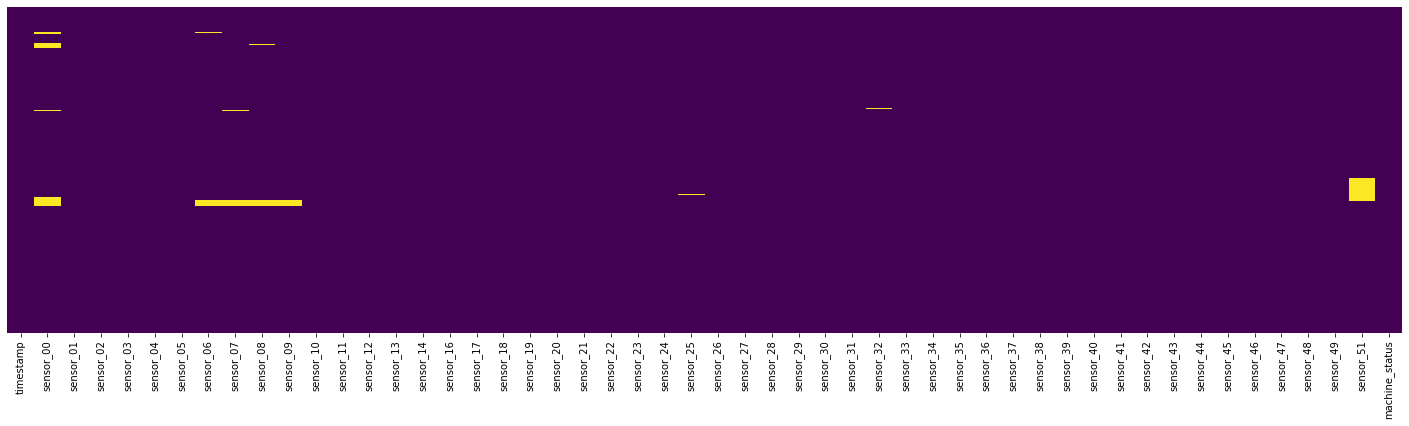

In [39]:
#check for nulls and deal with NaNs & update data types & feature engineering

#drop sensor 15 & 50
sensor.drop(["sensor_15", "sensor_50"], axis=1, inplace= True)


plt.figure(figsize=(25,6))
sns.heatmap(sensor.isnull(),yticklabels=False,cbar=False,cmap='viridis')


#fill empty rows with z-score

In [87]:
# encode machine status

machine_status ={"NORMAL":1 ,"RECOVERING":2, "BROKEN":3}

sensor["machine_status"] = sensor["machine_status"].map(machine_status)

### Handle missing values through Median or Modus (needs to get validated...)

- use Mean if not to many outliers...
- use Median if many outliers..

In [66]:
numeric = ['sensor_00', 'sensor_01', 'sensor_02', 'sensor_03',
       'sensor_04', 'sensor_05', 'sensor_06', 'sensor_07', 'sensor_08',
       'sensor_09', 'sensor_10', 'sensor_11', 'sensor_12', 'sensor_13',
       'sensor_14', 'sensor_16', 'sensor_17', 'sensor_18', 'sensor_19',
       'sensor_20', 'sensor_21', 'sensor_22', 'sensor_23', 'sensor_24',
       'sensor_25', 'sensor_26', 'sensor_27', 'sensor_28', 'sensor_29',
       'sensor_30', 'sensor_31', 'sensor_32', 'sensor_33', 'sensor_34',
       'sensor_35', 'sensor_36', 'sensor_37', 'sensor_38', 'sensor_39',
       'sensor_40', 'sensor_41', 'sensor_42', 'sensor_43', 'sensor_44',
       'sensor_45', 'sensor_46', 'sensor_47', 'sensor_48', 'sensor_49',
       'sensor_51']
       
#percentage of outliers
for k,v in sensor.items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(sensor)[0]

    if perc > 15:
        median = sensor[k].median()
        sensor[k]= sensor[k].fillna(median)
    else:
        mean = sensor[k].mean()
        sensor[k]= sensor[k].fillna(mean)

TypeError: unsupported operand type(s) for -: 'str' and 'str'

<AxesSubplot:>

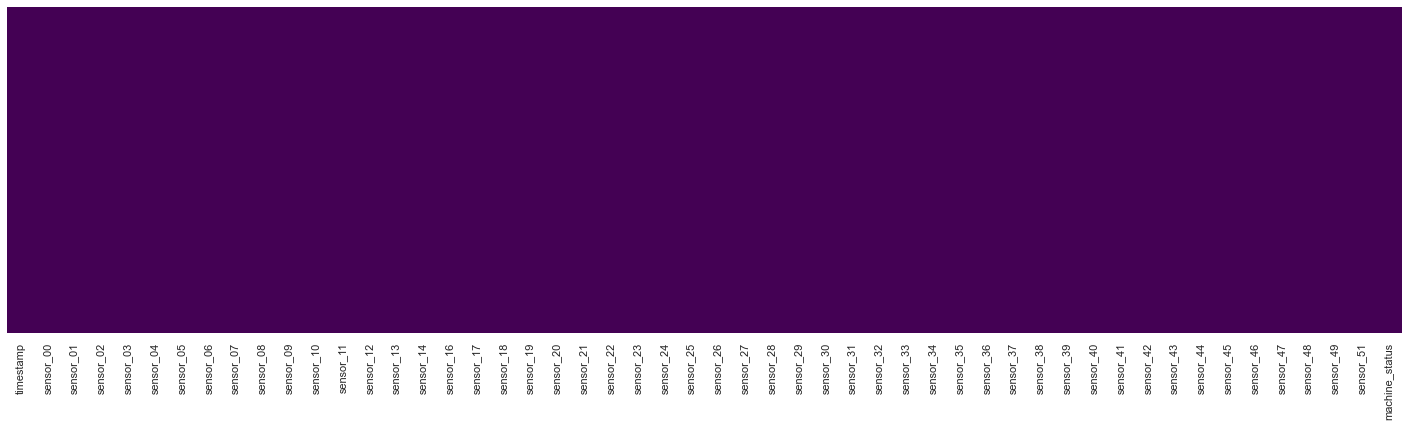

In [67]:
plt.figure(figsize=(25,6))
sns.heatmap(sensor.isnull(),yticklabels=False,cbar=False,cmap='viridis')

### LATER: Detect outliers and handle them maybe standardscale?

In [25]:
print(sensor.timestamp.max()-sensor.timestamp.min())

print(sensor.machine_status.value_counts())

152 days 23:59:00
NORMAL        205836
RECOVERING     14477
BROKEN             7
Name: machine_status, dtype: int64


In [9]:
sensor.describe()

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50,sensor_51
count,210112.000000,219951.000000,220301.000000,220301.000000,220301.000000,220301.000000,215522.000000,214869.000000,215213.000000,215725.000000,...,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,220293.000000,143303.000000,204937.000000
mean,2.372221,47.591611,50.867392,43.752481,590.673936,73.396414,13.501537,15.843152,15.200721,14.799210,...,35.453455,43.879591,42.656877,43.094984,48.018585,44.340903,150.889044,57.119968,183.049260,202.699667
std,0.412227,3.296666,3.666820,2.418887,144.023912,17.298247,2.163736,2.201155,2.037390,2.091963,...,10.259521,11.044404,11.576355,12.837520,15.641284,10.442437,82.244957,19.143598,65.258650,109.588607
min,0.000000,0.000000,33.159720,31.640620,2.798032,0.000000,0.014468,0.000000,0.028935,0.000000,...,22.135416,24.479166,25.752316,26.331018,26.331018,27.199070,26.331018,26.620370,27.488426,27.777779
25%,2.438831,46.310760,50.390620,42.838539,626.620400,69.976260,13.346350,15.907120,15.183740,15.053530,...,32.812500,39.583330,36.747684,36.747684,40.509258,39.062500,83.912030,47.743060,167.534700,179.108800
50%,2.456539,48.133678,51.649300,44.227428,632.638916,75.576790,13.642940,16.167530,15.494790,15.082470,...,35.156250,42.968750,40.509260,40.219910,44.849540,42.534720,138.020800,52.662040,193.865700,197.338000
75%,2.499826,49.479160,52.777770,45.312500,637.615723,80.912150,14.539930,16.427950,15.697340,15.118630,...,36.979164,46.614580,45.138890,44.849540,51.215280,46.585650,208.333300,60.763890,219.907400,216.724500
max,2.549016,56.727430,56.032990,48.220490,800.000000,99.999880,22.251160,23.596640,24.348960,25.000000,...,374.218800,408.593700,1000.000000,320.312500,370.370400,303.530100,561.632000,464.409700,1000.000000,1000.000000


<AxesSubplot:>

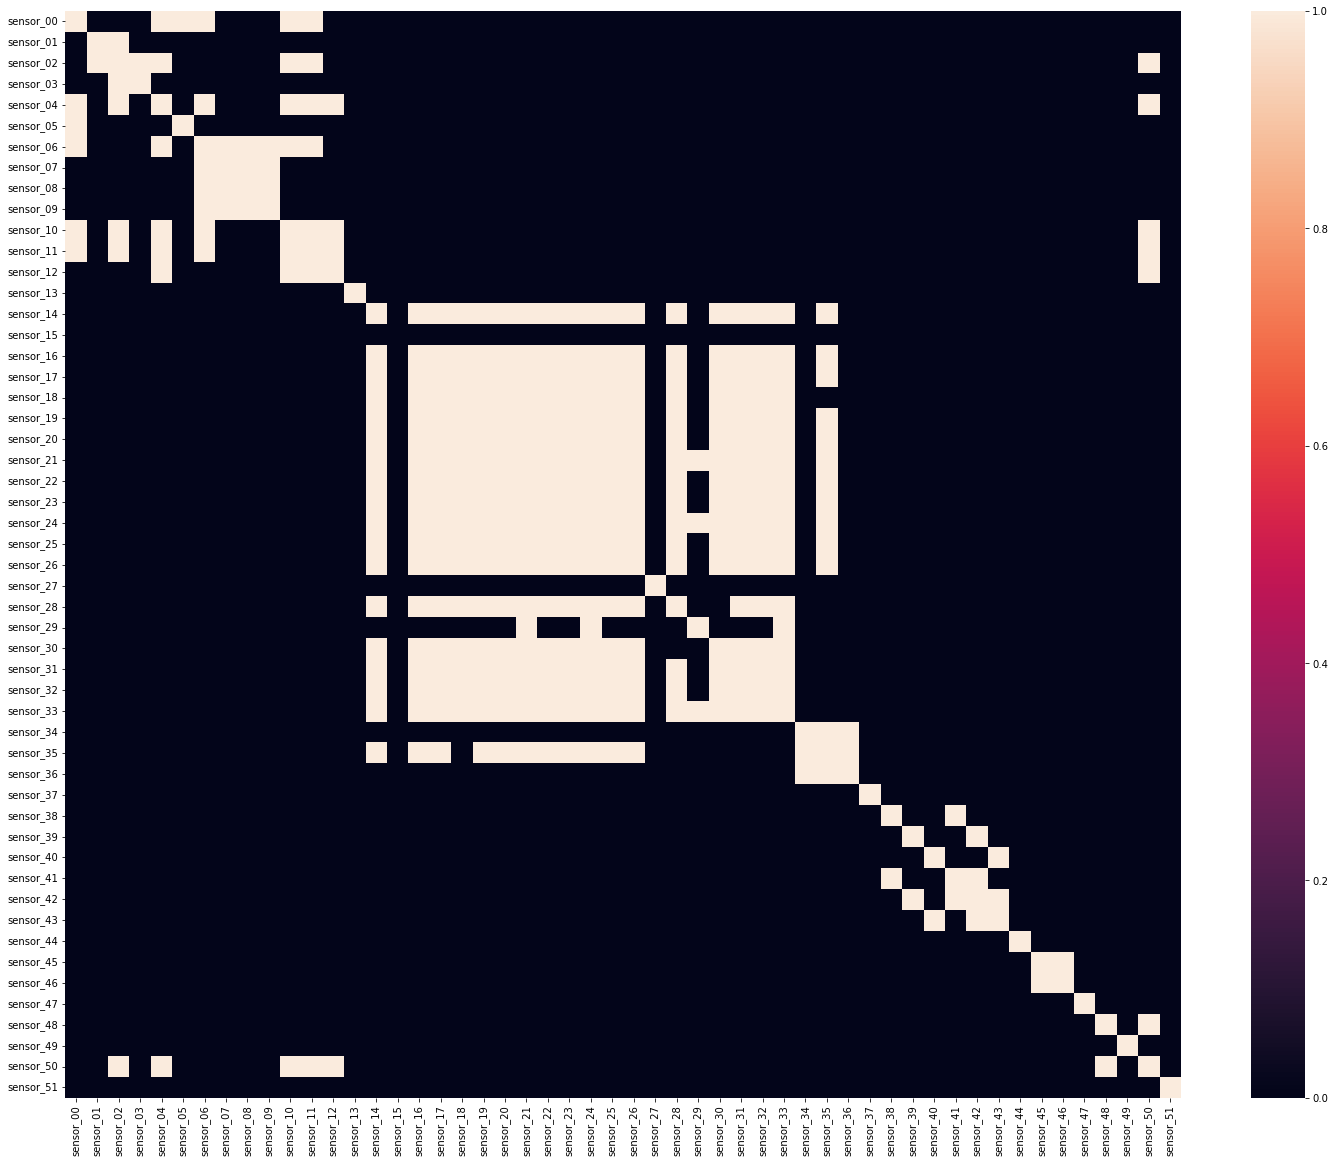

In [11]:
plt.figure(figsize=(25,20))
sns.heatmap(sensor.corr().abs()>0.7)

In [12]:
sensor.items()

<generator object DataFrame.items at 0x000002CC2906EE40>

### EDA
#### heatmap, etc

In [13]:
sensor.iloc[:,1:52]

,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,...,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_50
0,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556
1,2.465394,47.09201,53.211800,46.310760,634.375000,76.45975,13.41146,16.13136,15.56713,15.05353,...,30.989580,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,243.0556
2,2.444734,47.35243,53.211800,46.397570,638.888900,73.54598,13.32465,16.03733,15.61777,15.01013,...,30.468750,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,241.3194
3,2.460474,47.09201,53.168400,46.397568,628.125000,76.98898,13.31742,16.24711,15.69734,15.08247,...,30.468750,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,240.4514
4,2.445718,47.13541,53.211800,46.397568,636.458300,76.58897,13.35359,16.21094,15.69734,15.08247,...,30.989580,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,242.1875
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
220315,2.407350,47.69965,50.520830,43.142361,634.722229,64.59095,15.11863,16.65220,15.65393,15.16204,...,30.468750,30.208330,38.28125,68.287030,52.37268,48.32176,41.087960,212.3843,153.64580,NaN
220316,2.400463,47.69965,50.564240,43.142361,630.902771,65.83363,15.15480,16.70284,15.65393,15.11863,...,30.208332,29.947920,38.28125,66.840280,50.63657,48.03241,40.798610,213.8310,156.25000,NaN
220317,2.396528,47.69965,50.520830,43.142361,625.925903,67.29445,15.08970,16.70284,15.69734,15.11863,...,29.947920,30.208330,39.06250,65.393520,48.90046,48.03241,40.798610,217.3032,155.38190,NaN
220318,2.406366,47.69965,50.520832,43.142361,635.648100,65.09175,15.11863,16.56539,15.74074,15.11863,...,29.947916,30.208332,40.62500,64.236110,47.74306,48.32176,40.509258,222.5116,153.93520,NaN


In [14]:
#percentage of outliers
for k,v in sensor.iloc[:,1:52].items():
    q1 = v.quantile(0.25)
    q3 = v.quantile(0.75)
    iqr = q3 - q1
    v_col = v[(v <= q1 - 1.5 * iqr) | (v >= q3 + 1.5 * iqr)]
    perc = np.shape(v_col)[0] * 100.0 / np.shape(sensor)[0]
    print("%s Outliers = %.2f%%" % (k, perc))

sensor_00 Outliers = 9.08%
sensor_01 Outliers = 6.12%
sensor_02 Outliers = 7.03%
sensor_03 Outliers = 4.87%
sensor_04 Outliers = 12.36%
sensor_05 Outliers = 8.79%
sensor_06 Outliers = 5.33%
sensor_07 Outliers = 6.27%
sensor_08 Outliers = 7.17%
sensor_09 Outliers = 31.21%
sensor_10 Outliers = 8.54%
sensor_11 Outliers = 8.11%
sensor_12 Outliers = 13.02%
sensor_13 Outliers = 0.00%
sensor_14 Outliers = 26.40%
sensor_15 Outliers = 0.00%
sensor_16 Outliers = 22.16%
sensor_17 Outliers = 17.22%
sensor_18 Outliers = 17.19%
sensor_19 Outliers = 26.37%
sensor_20 Outliers = 27.04%
sensor_21 Outliers = 25.45%
sensor_22 Outliers = 12.68%
sensor_23 Outliers = 11.89%
sensor_24 Outliers = 14.08%
sensor_25 Outliers = 12.93%
sensor_26 Outliers = 12.68%
sensor_27 Outliers = 14.87%
sensor_28 Outliers = 12.55%
sensor_29 Outliers = 12.00%
sensor_30 Outliers = 16.86%
sensor_31 Outliers = 14.80%
sensor_32 Outliers = 12.16%
sensor_33 Outliers = 13.62%
sensor_34 Outliers = 0.00%
sensor_35 Outliers = 4.62%
sensor

In [15]:
#multiple boxplots to detect all outliers
# fig, axs = plt.subplots(ncols=5, nrows=10, figsize=(30,60))
# index = 0
# sns.set(font_scale=3)
# axs = axs.flatten()

# for k,v in sensor.items():
#     sns.boxplot(y=k, data=sensor.iloc[:,0:10], ax=axs[index])
#     index +=1
# plt.tight_layout(pad=0.4, w_pad=0.5, h_pad=5.0)

### 1. PCA or tsne

### 2. ML model XGBBoost

### 3. Deep Learning time series model

In [70]:
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

from sklearn.preprocessing import StandardScaler

from mpl_toolkits.mplot3d import Axes3D

In [71]:
sensor["timestamp"] = pd.to_datetime(sensor.timestamp)
y = sensor.machine_status
X = sensor.drop("machine_status", axis = 1)

In [72]:
scaler = StandardScaler()
scaler.fit(X.iloc[:,1:])

StandardScaler()

In [73]:
scaled_data = scaler.transform(X.iloc[:,1:])

In [74]:
pca = PCA(n_components = 2)

#try 3

In [75]:
pca.fit(scaled_data)

PCA(n_components=2)

In [76]:
x_pca = pca.transform(scaled_data)

In [79]:
print("Before PCA:")
print( scaled_data.shape)
print("After PCA:")
print(x_pca.shape)

Before PCA:
(220320, 50)
After PCA:
(220320, 2)


In [83]:
x_pca

array([[-0.046006, 0.489703],
       [-0.046006, 0.489703],
       [-0.186200, 0.499508],
       ...,
       [-2.044683, 2.472384],
       [-1.930656, 2.482947],
       [-1.976019, 2.448705]])

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


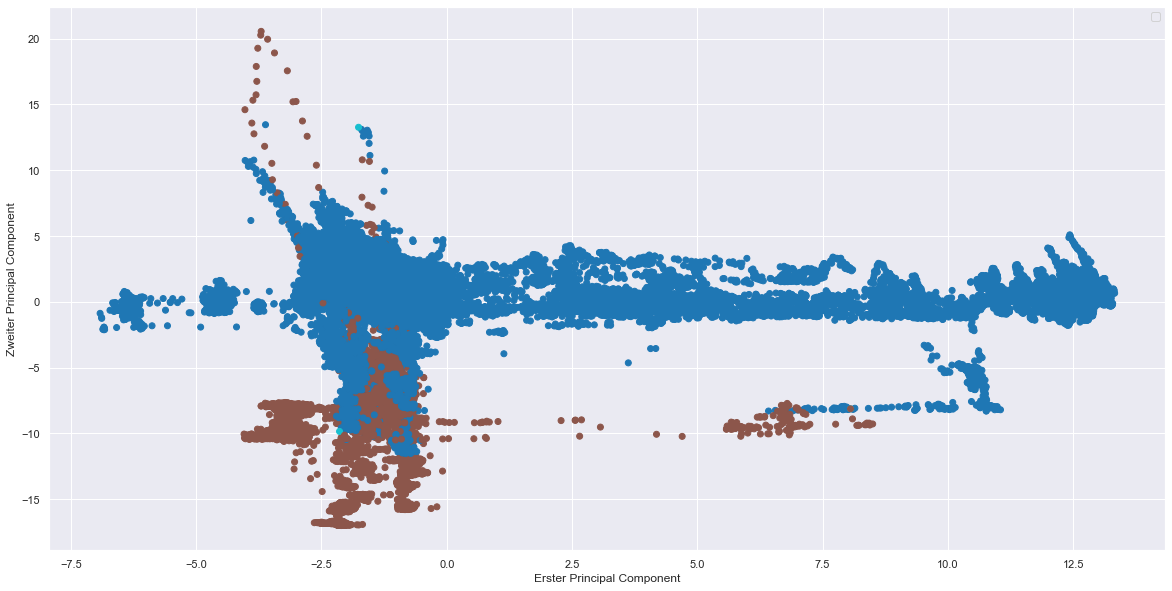

In [104]:
plt.figure(figsize=(20,10))
plt.scatter(x_pca[:,0],x_pca[:,1],c=sensor["machine_status"],cmap="tab10")
plt.xlabel('Erster Principal Component')
plt.ylabel('Zweiter Principal Component')
plt.legend()

<AxesSubplot:>

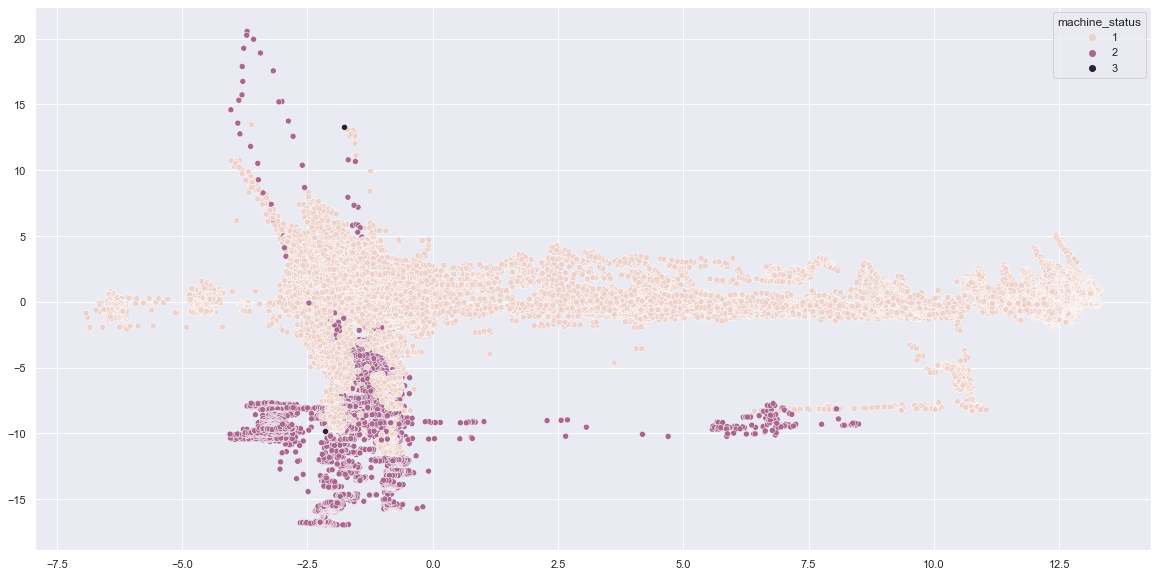

In [108]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = x_pca, x = x_pca[:,0], y = x_pca[:,1], hue=sensor["machine_status"], legend = machine_status)

In [88]:
sensor.head()

,timestamp,sensor_00,sensor_01,sensor_02,sensor_03,sensor_04,sensor_05,sensor_06,sensor_07,sensor_08,sensor_09,sensor_10,sensor_11,sensor_12,sensor_13,sensor_14,sensor_16,sensor_17,sensor_18,sensor_19,sensor_20,sensor_21,sensor_22,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,sensor_33,sensor_34,sensor_35,sensor_36,sensor_37,sensor_38,sensor_39,sensor_40,sensor_41,sensor_42,sensor_43,sensor_44,sensor_45,sensor_46,sensor_47,sensor_48,sensor_49,sensor_51,machine_status
0,2018-04-01 00:00:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
1,2018-04-01 00:01:00,2.465394,47.09201,53.2118,46.310760,634.3750,76.45975,13.41146,16.13136,15.56713,15.05353,37.22740,47.52422,31.11716,1.681353,419.5747,461.8781,466.3284,2.565284,665.3993,398.9862,880.0001,498.8926,975.9409,627.6740,741.7151,848.0708,429.0377,785.1935,684.9443,594.4445,682.8125,680.4416,433.7037,171.9375,341.9039,195.0655,90.32386,40.36458,31.51042,70.57291,30.98958,31.770832,41.92708,39.641200,65.68287,50.92593,38.194440,157.9861,67.70834,201.3889,1
2,2018-04-01 00:02:00,2.444734,47.35243,53.2118,46.397570,638.8889,73.54598,13.32465,16.03733,15.61777,15.01013,37.86777,48.17723,32.08894,1.708474,420.8480,462.7798,459.6364,2.500062,666.2234,399.9418,880.4237,501.3617,982.7342,631.1326,740.8031,849.8997,454.2390,778.5734,715.6266,661.5740,721.8750,694.7721,441.2635,169.9820,343.1955,200.9694,93.90508,41.40625,31.25000,69.53125,30.46875,31.770830,41.66666,39.351852,65.39352,51.21528,38.194443,155.9606,67.12963,203.7037,1
3,2018-04-01 00:03:00,2.460474,47.09201,53.1684,46.397568,628.1250,76.98898,13.31742,16.24711,15.69734,15.08247,38.57977,48.65607,31.67221,1.579427,420.7494,462.8980,460.8858,2.509521,666.0114,399.1046,878.8917,499.0430,977.7520,625.4076,739.2722,847.7579,474.8731,779.5091,690.4011,686.1111,754.6875,683.3831,446.2493,166.4987,343.9586,193.1689,101.04060,41.92708,31.51042,72.13541,30.46875,31.510420,40.88541,39.062500,64.81481,51.21528,38.194440,155.9606,66.84028,203.1250,1
4,2018-04-01 00:04:00,2.445718,47.13541,53.2118,46.397568,636.4583,76.58897,13.35359,16.21094,15.69734,15.08247,39.48939,49.06298,31.95202,1.683831,419.8926,461.4906,468.2206,2.604785,663.2111,400.5426,882.5874,498.5383,979.5755,627.1830,737.6033,846.9182,408.8159,785.2307,704.6937,631.4814,766.1458,702.4431,433.9081,164.7498,339.9630,193.8770,101.70380,42.70833,31.51042,76.82291,30.98958,31.510420,41.40625,38.773150,65.10416,51.79398,38.773150,158.2755,66.55093,201.3889,1


<AxesSubplot:>

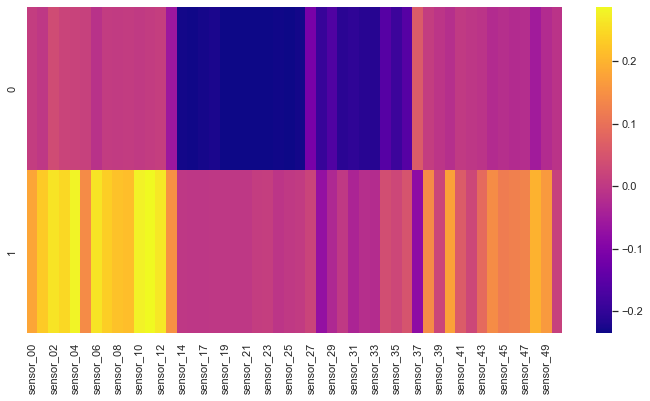

In [109]:
df_comp = pd.DataFrame(pca.components_,columns=X.iloc[:,1:].columns)

plt.figure(figsize=(12,6))
sns.heatmap(df_comp,cmap='plasma',)

In [110]:
#TSNE dimension reduction

tsne = TSNE(n_components=2, verbose=1, perplexity=40, n_iter=300)
tsne_results = tsne.fit_transform(X.iloc[:,1:])


[t-SNE] Computing 121 nearest neighbors...
[t-SNE] Indexed 220320 samples in 0.008s...
[t-SNE] Computed neighbors for 220320 samples in 724.255s...
[t-SNE] Computed conditional probabilities for sample 1000 / 220320
[t-SNE] Computed conditional probabilities for sample 2000 / 220320
[t-SNE] Computed conditional probabilities for sample 3000 / 220320
[t-SNE] Computed conditional probabilities for sample 4000 / 220320
[t-SNE] Computed conditional probabilities for sample 5000 / 220320
[t-SNE] Computed conditional probabilities for sample 6000 / 220320
[t-SNE] Computed conditional probabilities for sample 7000 / 220320
[t-SNE] Computed conditional probabilities for sample 8000 / 220320
[t-SNE] Computed conditional probabilities for sample 9000 / 220320
[t-SNE] Computed conditional probabilities for sample 10000 / 220320
[t-SNE] Computed conditional probabilities for sample 11000 / 220320
[t-SNE] Computed conditional probabilities for sample 12000 / 220320
[t-SNE] Computed conditional prob

<AxesSubplot:>

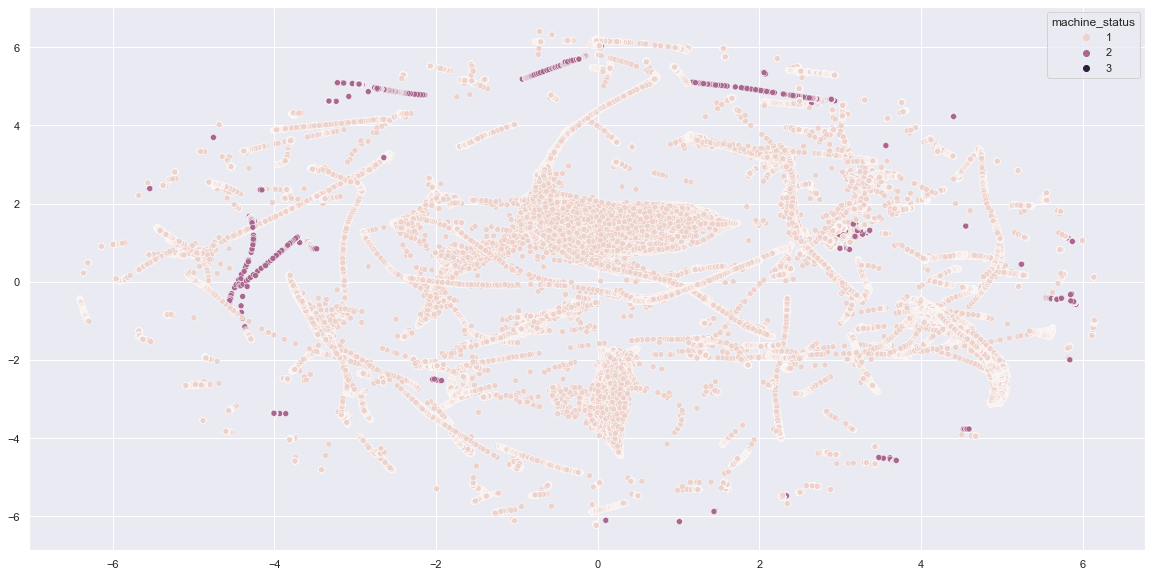

In [113]:
plt.figure(figsize=(20,10))
sns.scatterplot(data = tsne_results, x = tsne_results[:,0], y = tsne_results[:,1], hue=sensor["machine_status"])

### Do some machine learning with the "only" two remaining columns to predict machine failure
- TSNE needs some more rework -> so use PCA